# Lab 4 - Feedforward Neural Network

## Question 1
Implement two layer Feed Forward Neural Network for XOR Logic Gate with 2-bit Binary
Input using Sigmoid activation. Verify the number of learnable parameters in the model.

XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)
Epoch 0/10000, Loss: 0.301132844761014
Epoch 1000/10000, Loss: 0.27038102224469185
Epoch 2000/10000, Loss: 0.27022553235292435
Epoch 3000/10000, Loss: 0.26847536861896515
Epoch 4000/10000, Loss: 0.26516806334257126
Epoch 5000/10000, Loss: 0.22409657016396523
Epoch 6000/10000, Loss: 0.0001402673997290549
Epoch 7000/10000, Loss: 1.2700951401711791e-11
Epoch 8000/10000, Loss: 3.2152058793144533e-12
Epoch 9000/10000, Loss: 3.0020430585864233e-12

Learnable Parameters:
('linear1.weight', Parameter containing:
tensor([[-1.9767,  2.0750],
        [-3.0809,  3.3435]], device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([ 0.7012, -2.5002], device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-2.6653,  2.7713]], device='cuda:0', requires_grad=True))
('linear2.bias', Par

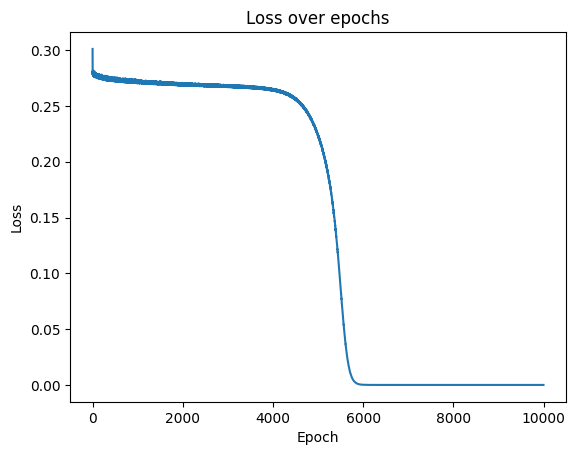

In [ ]:
import torch
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

loss_list = []
torch.manual_seed(42)
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
Y = torch.tensor([0,1,1,0], dtype=torch.float32)

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.linear1 = nn.Linear(2, 2, bias=True)
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        return x

class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

full_dataset = MyDataset(X, Y)
batch_size = 1

# Create the dataloaders for reading data
train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

# Find if CUDA is available to load the model and device onto the available device (CPU/GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model to GPU
model = XORModel().to(device)
print(model)

# Add the criterion which is the MSELoss
loss_fn = torch.nn.MSELoss()
# Optimizer specified in the torch.optim package
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

EPOCHS = 10000

def train_one_epoch(epoch_index):
    totalloss = 0
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs.to(device))
        loss = loss_fn(outputs.flatten(), labels.to(device))
        loss.backward()
        optimizer.step()
        totalloss += loss.item()
    return totalloss / (len(train_data_loader) * batch_size)

for epoch in range(EPOCHS):
    model.train()
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}/{EPOCHS}, Loss: {avg_loss}')

# Print the model parameters (learnable parameters)
print("\nLearnable Parameters:")
for param in model.named_parameters():
    print(param)

# Calculate the number of learnable parameters manually
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of learnable parameters: {total_params}")

# Test the model
input_data = torch.tensor([0, 1], dtype=torch.float32).to(device)
model.eval()
print("The input = {}".format(input_data))
print("Output y predicted = {}".format(model(input_data)))

# Plot the loss over epochs
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.show()


## Question 2
Repeat Qn 1 by modifying the activation function to ReLU.

XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): ReLU()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)
Epoch 0/10000, Loss: 0.28828215412795544
Epoch 1000/10000, Loss: 0.13222978546400554
Epoch 2000/10000, Loss: 0.13277034627981266
Epoch 3000/10000, Loss: 0.13273568680347125
Epoch 4000/10000, Loss: 0.13273096554848962
Epoch 5000/10000, Loss: 0.1327835510719524
Epoch 6000/10000, Loss: 0.1328371121908276
Epoch 7000/10000, Loss: 0.13272638581878482
Epoch 8000/10000, Loss: 0.13273535281267357
Epoch 9000/10000, Loss: 0.1324844262948659

Learnable Parameters:
('linear1.weight', Parameter containing:
tensor([[ 0.6139,  0.6554],
        [-0.6774,  0.6844]], device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([-0.6271, -0.0178], device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-0.7764,  0.7782]], device='cuda:0', requires_grad=True))
('linear2.bias', Parameter containi

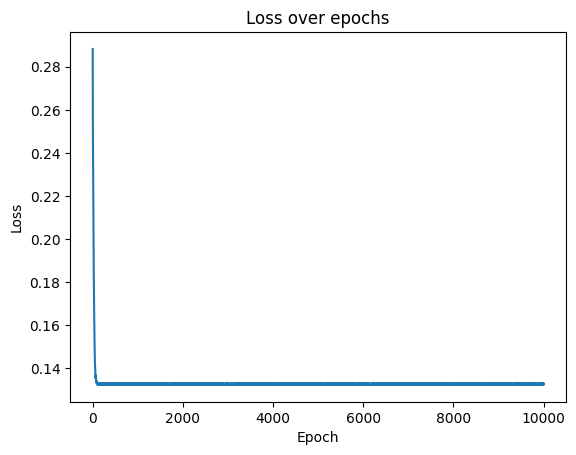

In [ ]:
import torch
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

loss_list = []
torch.manual_seed(42)
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
Y = torch.tensor([0,1,1,0], dtype=torch.float32)

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.linear1 = nn.Linear(2, 2, bias=True)
        self.activation1 = nn.ReLU()  # Changed to ReLU
        self.linear2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)  # Applying ReLU activation
        x = self.linear2(x)
        return x

class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)
named_parameters  
full_dataset = MyDataset(X, Y)
batch_size = 1

train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = XORModel().to(device)
print(model)

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

EPOCHS = 10000

def train_one_epoch(epoch_index):
    totalloss = 0
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs.to(device))
        loss = loss_fn(outputs.flatten(), labels.to(device))
        loss.backward()
        optimizer.step()
        totalloss += loss.item()
    return totalloss / (len(train_data_loader) * batch_size)

for epoch in range(EPOCHS):
    model.train()
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}/{EPOCHS}, Loss: {avg_loss}')

print("\nLearnable Parameters:")
for param in model.named_parameters():
    print(param)

total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of learnable parameters: {total_params}")

input_data = torch.tensor([0, 1], dtype=torch.float32).to(device)
model.eval()
print("The input = {}".format(input_data))
print("Output y predicted = {}".format(model(input_data)))

plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.show()
    

## Question 3
Manually verify the output values by taking system generated values of weights and biases
for both Linear1 and Linear2 layers for Qn 1 and apply the transformations to input X and
implement the same

In [13]:
import torch
import torch.nn as nn
import numpy as np

X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float32)
Y = torch.tensor([0, 1, 1, 0], dtype=torch.float32)

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.linear1 = nn.Linear(2, 2, bias=True)
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        return x

model = XORModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)
loss_fn = nn.MSELoss()

EPOCHS = 10000
for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    output = model(X)
    loss = loss_fn(output.flatten(), Y)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}/{EPOCHS}, Loss: {loss.item()}')

# Extract learned weights and biases for Linear1 and Linear2
linear1_weight = model.linear1.weight.data.numpy()
linear1_bias = model.linear1.bias.data.numpy()
linear2_weight = model.linear2.weight.data.numpy()
linear2_bias = model.linear2.bias.data.numpy()

print("\nLearned Parameters:")
print(f"Linear1 Weights: {linear1_weight}")
print(f"Linear1 Bias: {linear1_bias}")
print(f"Linear2 Weights: {linear2_weight}")
print(f"Linear2 Bias: {linear2_bias}")

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Step 1: Linear1 transformation (X W1 + b1)
Z1 = np.dot(X.numpy(), linear1_weight.T) + linear1_bias
A1 = sigmoid(Z1)  # Apply Sigmoid activation

# Step 2: Linear2 transformation (A1 W2 + b2)
Z2 = np.dot(A1, linear2_weight.T) + linear2_bias
A2 = sigmoid(Z2) 

print("\nManually Computed Outputs:")
print(A2)

model.eval()
output = model(X)
print("\nModel Predicted Outputs:")
print(output.detach().numpy())



Epoch 0/10000, Loss: 0.9077744483947754
Epoch 1000/10000, Loss: 0.25079548358917236
Epoch 2000/10000, Loss: 0.2502095103263855
Epoch 3000/10000, Loss: 0.25002843141555786
Epoch 4000/10000, Loss: 0.24995270371437073
Epoch 5000/10000, Loss: 0.24990735948085785
Epoch 6000/10000, Loss: 0.24986682832241058
Epoch 7000/10000, Loss: 0.2498193234205246
Epoch 8000/10000, Loss: 0.24975626170635223
Epoch 9000/10000, Loss: 0.24966736137866974

Learned Parameters:
Linear1 Weights: [[ 0.4979854  -0.49998492]
 [-0.20814915  0.02298333]]
Linear1 Bias: [-0.41021824  0.31794882]
Linear2 Weights: [[0.21618113 0.33772707]]
Linear2 Bias: [0.22559087]

Manually Computed Outputs:
[[0.62417364]
 [0.6189277 ]
 [0.6263399 ]
 [0.62052363]]

Model Predicted Outputs:
[[0.50730145]
 [0.48499924]
 [0.5165466 ]
 [0.4917714 ]]


## Question 4
Implement Feed Forward Neural Network with two hidden layers for classifying
handwritten digits using MNIST dataset. Display the classification accuracy in the form
of a Confusion matrix. Verify the number of learnable parameters in the model.

Total learnable parameters: 89610
Epoch [1/5], Loss: 0.3743906860182217
Epoch [2/5], Loss: 0.17252732657178094
Epoch [3/5], Loss: 0.13083027047452642
Epoch [4/5], Loss: 0.10429782196402804
Epoch [5/5], Loss: 0.0903470966163705


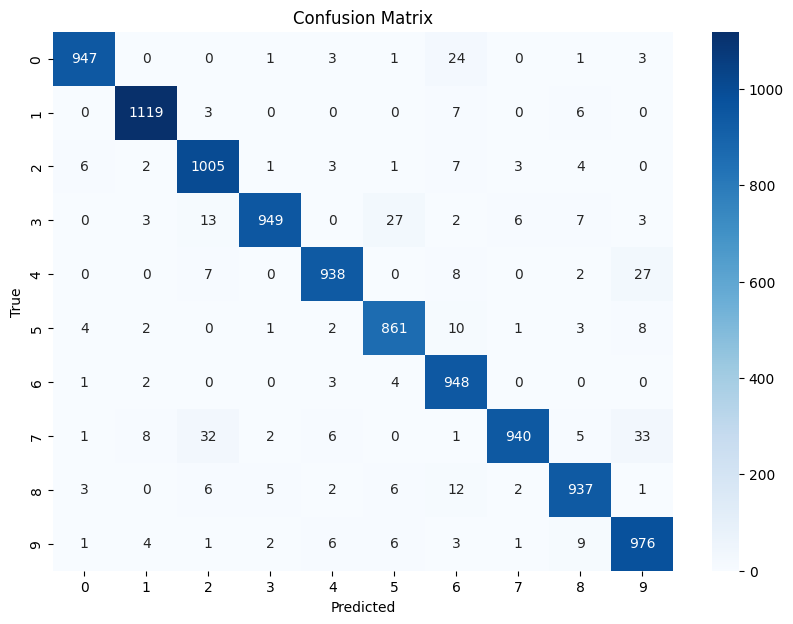

Accuracy: 96.20%


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set device to GPU if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the Feed Forward Neural Network model with 2 hidden layers
class FeedForwardNN(nn.Module):
    def __init__(self):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 100)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(100, 100)       # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(100, 10)        # Second hidden layer to output layer
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input image
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = FeedForwardNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
def train_model():
    num_epochs = 5
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')

# Evaluate the model and compute confusion matrix
def evaluate_model():
    model.eval()  # Set model to evaluation mode
    y_true = []
    y_pred = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm)

    # Calculate accuracy
    accuracy = np.sum(np.array(y_true) == np.array(y_pred)) / len(y_true)
    print(f'Accuracy: {accuracy * 100:.2f}%')

# Function to plot confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Calculate number of learnable parameters
def count_parameters():
    total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f'Total learnable parameters: {total_params}')

# Run the training and evaluation
if __name__ == "__main__":
    count_parameters()
    train_model()
    evaluate_model()
